In [1]:
# import modules 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
paris = pd.read_csv('paris_onemonth.csv')

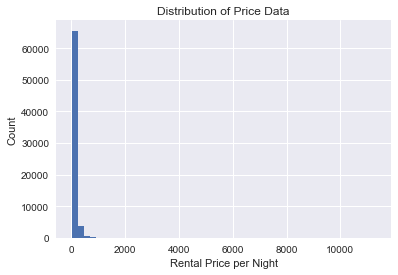

In [3]:
# examine price data

plt.hist(paris.price, bins = 50)
plt.title('Distribution of Price Data')
plt.xlabel('Rental Price per Night')
plt.ylabel('Count')
plt.show()

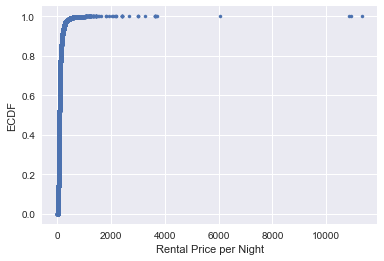

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x,y


x, y = ecdf(paris.price)

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Rental Price per Night')
plt.ylabel('ECDF')
plt.show()


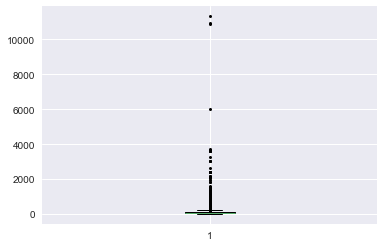

In [5]:
plt.boxplot(paris.price, sym='k.')
plt.show()

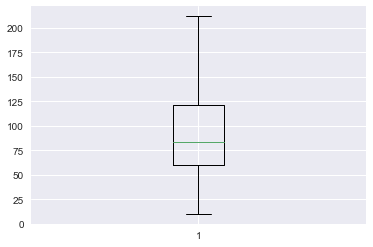

In [6]:
plt.boxplot(paris.price, showfliers=False)
plt.show()

In [7]:
# it might help to get rid of outliers
# outliers are 1.5*iqr above 3rd quartile or below 1st quartile
iqr = np.percentile(paris.price, 75) - np.percentile(paris.price, 25)
upper_bound = (1.5 * iqr) + np.percentile(paris.price, 75)
print(upper_bound)
lower_bound = np.percentile(paris.price, 25) -(1.5 * iqr)
print(lower_bound)

# only need to remove high outliers 

212.5
-31.5


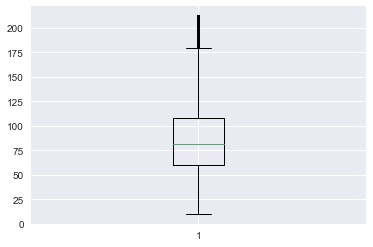

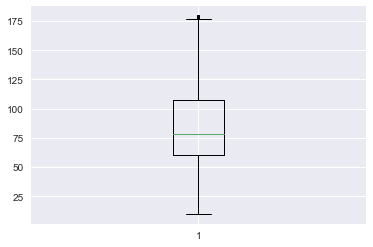

In [8]:
paris = paris[paris['price'] <  upper_bound]
plt.boxplot(paris.price, sym='k.')
plt.show()

iqr = np.percentile(paris.price, 75) - np.percentile(paris.price, 25)
upper_bound = (1.5 * iqr) + np.percentile(paris.price, 75)
paris = paris[paris['price'] <  upper_bound]

plt.boxplot(paris.price, sym='k.')
plt.show()


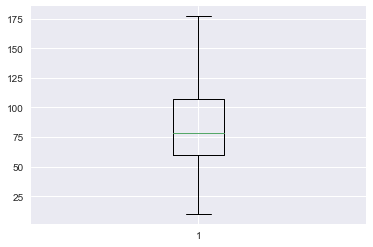

In [9]:
iqr = np.percentile(paris.price, 75) - np.percentile(paris.price, 25)
upper_bound = (1.5 * iqr) + np.percentile(paris.price, 75)
paris = paris[paris['price'] <  upper_bound]


plt.boxplot(paris.price, sym='k.')
plt.show()


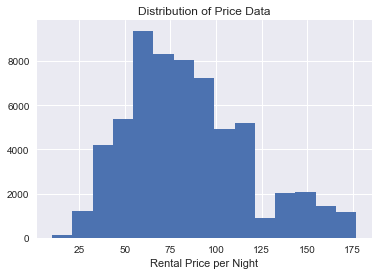

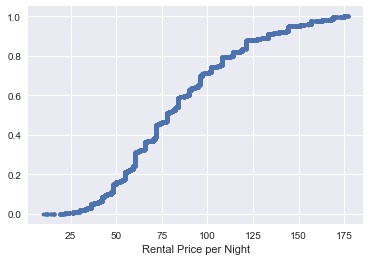

In [11]:
plt.hist(paris.price, bins = 15)
plt.title('Distribution of Price Data')
plt.xlabel('Rental Price per Night')
# plt.ylabel('Count')
plt.show()

x, y = ecdf(paris.price)

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Rental Price per Night')
# plt.ylabel('ECDF')
plt.show()

# that looks way better  - a bit bimodal

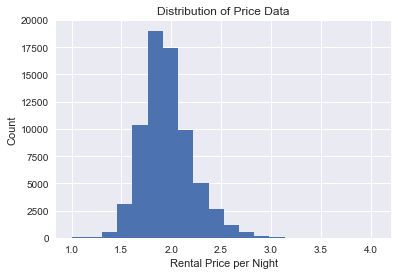

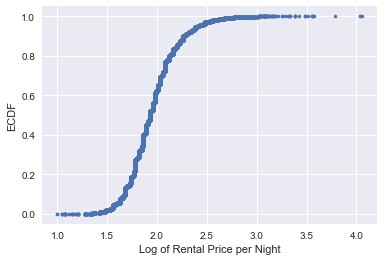

In [5]:
# an alternative could be logging price - made models with this and interpretation was difficult

x_log, y_log = ecdf(paris.log_price)

plt.hist(paris.log_price, bins = 20)
plt.title('Distribution of Price Data')
plt.xlabel('Rental Price per Night')
plt.ylabel('Count')
plt.show()

plt.plot(x_log, y_log, marker='.', linestyle='none')
plt.xlabel('Log of Rental Price per Night')
plt.ylabel('ECDF')
plt.show()

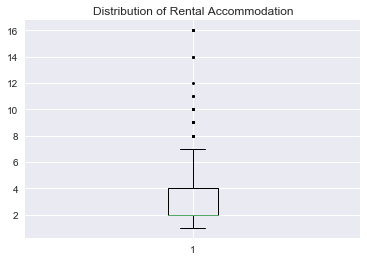

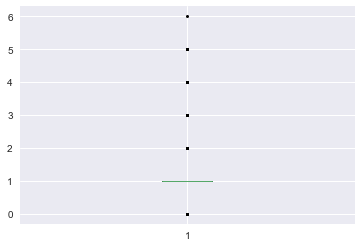

In [12]:
# look for outliers elsewhere
# accommodates

plt.boxplot(paris.accommodates, sym='k.')
plt.title('Distribution of Rental Accommodation')
plt.show()

# remove listings that accommodate more than 7 people 
paris = paris[paris['accommodates'] <= 7]

plt.boxplot(paris.bedrooms, sym='k.')
plt.show()

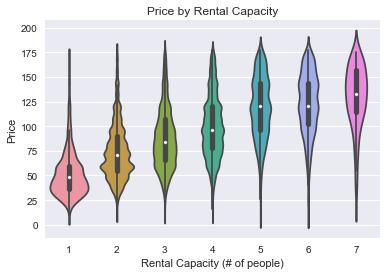

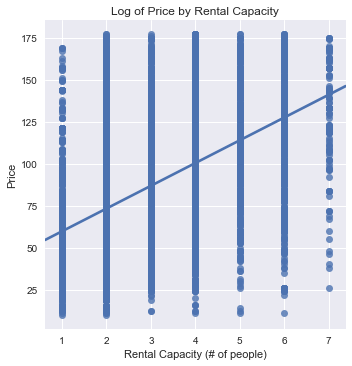

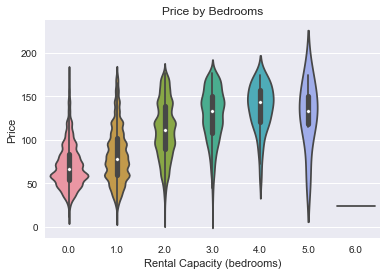

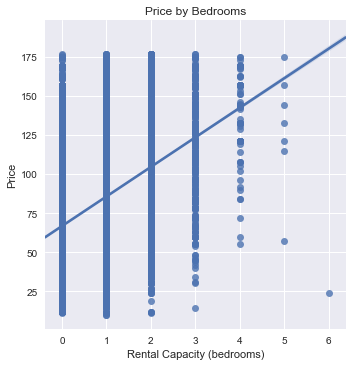

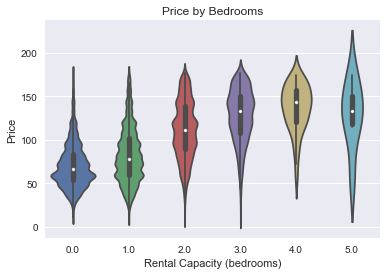

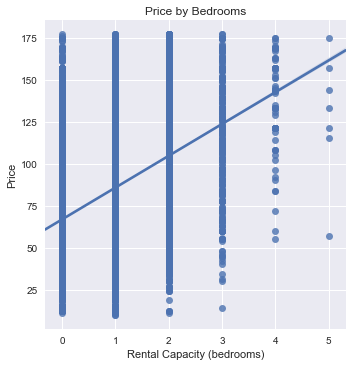

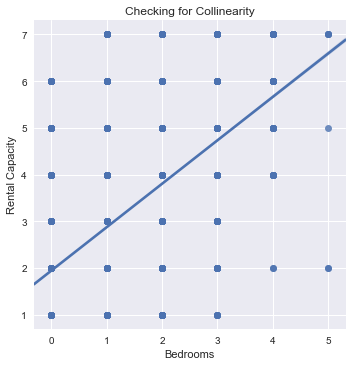

In [13]:
# examine rental capacity 
sns.violinplot(paris.accommodates, paris.price)
plt.ylabel('Price')
plt.xlabel('Rental Capacity (# of people)')
plt.title('Price by Rental Capacity')
plt.show()

sns.lmplot(x='accommodates', y='price', data=paris, fit_reg=True, legend=True)
plt.xlabel('Rental Capacity (# of people)')
plt.ylabel('Price')
plt.title('Log of Price by Rental Capacity')
sns.plt.show()


sns.violinplot(paris.bedrooms, paris.price)
plt.ylabel('Price')
plt.xlabel('Rental Capacity (bedrooms)')
plt.title('Price by Bedrooms')
plt.show()

sns.lmplot(x='bedrooms', y='price', data=paris, fit_reg=True, legend=True)
plt.xlabel('Rental Capacity (bedrooms)')
plt.ylabel('Price')
plt.title('Price by Bedrooms')
sns.plt.show()

# get rid of outlier wtih 6 bedrooms and very low price 
paris = paris[paris['bedrooms'] < 6]


sns.violinplot(paris.bedrooms, paris.price)
plt.ylabel('Price')
plt.xlabel('Rental Capacity (bedrooms)')
plt.title('Price by Bedrooms')
plt.show()

sns.lmplot(x='bedrooms', y='price', data=paris, fit_reg=True, legend=True)
plt.xlabel('Rental Capacity (bedrooms)')
plt.ylabel('Price')
plt.title('Price by Bedrooms')
sns.plt.show()

sns.lmplot(x='bedrooms', y='accommodates', data=paris, fit_reg=True, legend=True)
plt.xlabel('Bedrooms')
plt.ylabel('Rental Capacity')
plt.title('Checking for Collinearity')
sns.plt.show()



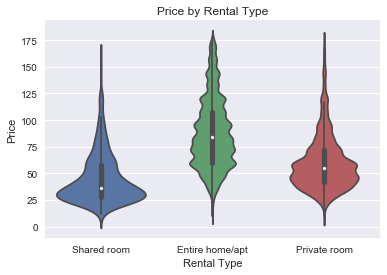

In [14]:
# room type

sns.violinplot(paris.room_type, paris.price)
plt.ylabel('Price')
plt.xlabel('Rental Type')
plt.title('Price by Rental Type')
plt.show()

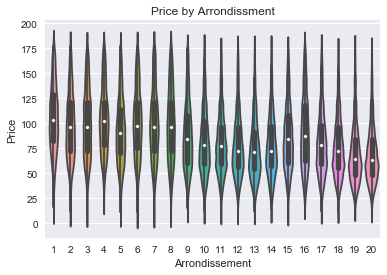

In [15]:
# examine arrondissements

sns.violinplot(paris.arrondissement, paris.price)
plt.ylabel('Price')
plt.xlabel('Arrondissement')
plt.title('Price by Arrondissment')
plt.show()

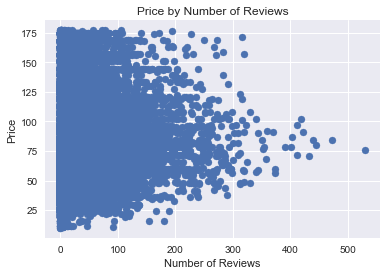

In [16]:
# examine reviews 
plt.scatter(paris.reviews, paris.price)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price by Number of Reviews')
plt.show()

In [17]:
# split data into listings with reviews and those without 

paris_rev = paris[paris['reviews'] > 0]
paris_notrev = paris[paris['reviews'] == 0]

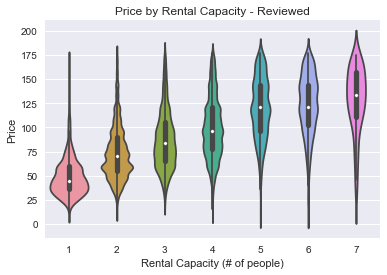

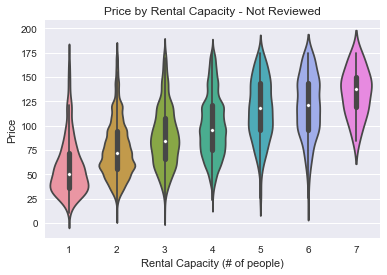

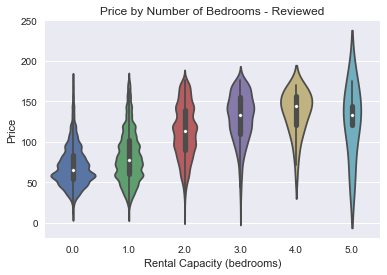

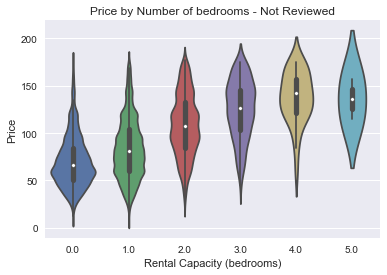

In [18]:
# examine rental capacity 
sns.violinplot(paris_rev.accommodates, paris_rev.price)
plt.ylabel('Price')
plt.xlabel('Rental Capacity (# of people)')
plt.title('Price by Rental Capacity - Reviewed')
plt.show()

# examine rental capacity 
sns.violinplot(paris_notrev.accommodates, paris_notrev.price)
plt.ylabel('Price')
plt.xlabel('Rental Capacity (# of people)')
plt.title('Price by Rental Capacity - Not Reviewed')
plt.show()


# bedrooms 
sns.violinplot(paris_rev.bedrooms, paris_rev.price)
plt.ylabel('Price')
plt.xlabel('Rental Capacity (bedrooms)')
plt.title('Price by Number of Bedrooms - Reviewed')
plt.show()

sns.violinplot(paris_notrev.bedrooms, paris_notrev.price)
plt.ylabel('Price')
plt.xlabel('Rental Capacity (bedrooms)')
plt.title('Price by Number of bedrooms - Not Reviewed')
plt.show()

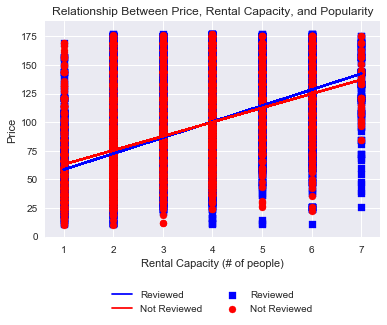

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(paris_rev.accommodates, paris_rev.price, c='b', marker="s", label='Reviewed')
m, b = np.polyfit(paris_rev.accommodates, paris_rev.price, 1)
ax1.plot(paris_rev.accommodates, m*paris_rev.accommodates + b, '-', c = 'b', label = 'Reviewed')
ax1.scatter(paris_notrev.accommodates, paris_notrev.price, c='r', marker="o", label='Not Reviewed')
l, p = np.polyfit(paris_notrev.accommodates, paris_notrev.price, 1)
ax1.plot(paris_notrev.accommodates, l*paris_notrev.accommodates + p, '-', c = 'r', label = 'Not Reviewed')
plt.title('Relationship Between Price, Rental Capacity, and Popularity')
plt.xlabel('Rental Capacity (# of people)')
plt.ylabel('Price')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.show()

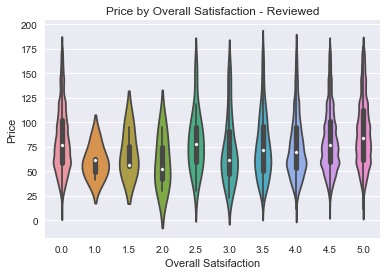

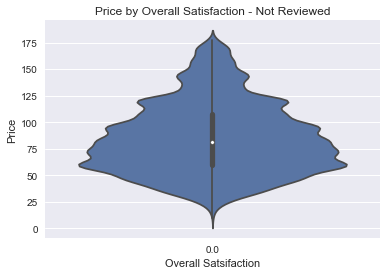

In [20]:
sns.violinplot(paris_rev.overall_satisfaction, paris_rev.price)
plt.xlabel('Overall Satsifaction')
plt.ylabel('Price')
plt.title('Price by Overall Satisfaction - Reviewed')
plt.show()

sns.violinplot(paris_notrev.overall_satisfaction, paris_notrev.price)
plt.xlabel('Overall Satsifaction')
plt.ylabel('Price')
plt.title('Price by Overall Satisfaction - Not Reviewed')
plt.show()

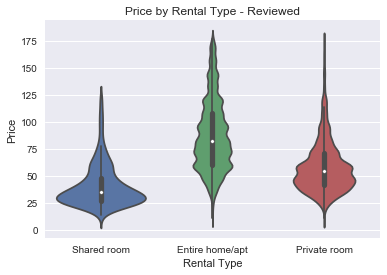

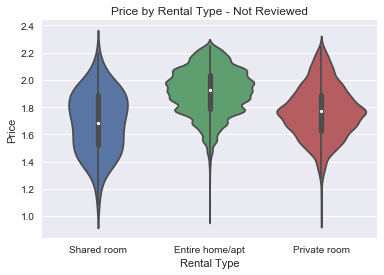

In [21]:
sns.violinplot(paris_rev.room_type, paris_rev.price)
plt.ylabel('Price')
plt.xlabel('Rental Type')
plt.title('Price by Rental Type - Reviewed')
plt.show()

sns.violinplot(paris_notrev.room_type, paris_notrev.log_price)
plt.ylabel('Price')
plt.xlabel('Rental Type')
plt.title('Price by Rental Type - Not Reviewed')
plt.show()

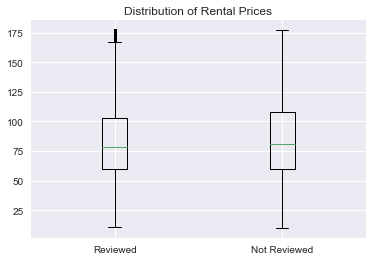

In [22]:
plt.boxplot([paris_rev.price, paris_notrev.price], sym='k.')
plt.xticks([1, 2], ['Reviewed', 'Not Reviewed'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

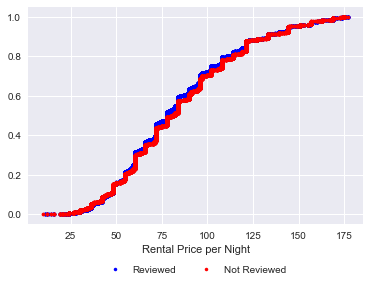

In [23]:
x_rev, y_rev = ecdf(paris_rev.price)
x_nr, y_nr = ecdf(paris_notrev.price)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x_rev, y_rev, marker='.', linestyle='none', c='b', label='Reviewed')
ax1.plot(x_nr, y_nr, marker='.', linestyle='none', c = 'r', label = 'Not Reviewed')
plt.xlabel('Rental Price per Night')
#plt.ylabel('ECDF')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

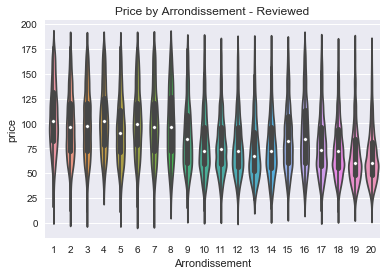

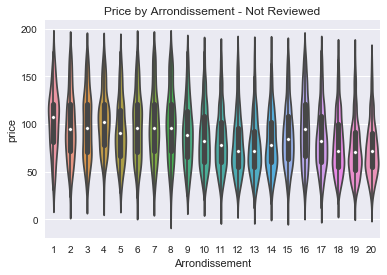

In [24]:
sns.violinplot(paris_rev.arrondissement, paris_rev.price)
plt.xlabel('Arrondissement')
# plt.ylabel('Log Price')
plt.title('Price by Arrondissement - Reviewed')
plt.show()

sns.violinplot(paris_notrev.arrondissement, paris_notrev.price)
plt.xlabel('Arrondissement')
# plt.ylabel('Log Price')
plt.title('Price by Arrondissement - Not Reviewed')
plt.show()

In [25]:
# linear regression - reviewed vs not reviewed 

paris.columns
X = paris_rev[['room_type', 'accommodates', 'arrondissement', 'bedrooms']]

In [26]:
X = pd.get_dummies(X, columns = ['arrondissement', 'room_type'])


In [27]:
X = X.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [28]:
X_nr = paris_notrev[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]
X_nr= pd.get_dummies(X_nr, columns = ['room_type', 'arrondissement'])


In [29]:
X_nr = X_nr.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [31]:
# regression  - rentals that have been reviewed 

import statsmodels.api as sm
from statsmodels.formula.api import ols

# add constant 
X = sm.add_constant(X)

y_rev = paris_rev.price

lm_rev = sm.OLS(y_rev, X).fit()

print(lm_rev.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     1487.
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:45:42   Log-Likelihood:            -2.0958e+05
No. Observations:               45184   AIC:                         4.192e+05
Df Residuals:                   45160   BIC:                         4.194e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     33

In [32]:
coef_rev = []
for i in lm_rev.params:
    coef_rev.append(i)

se_rev = []
for i in lm_rev.bse:
    se_rev.append(i)
    
    
review_df = pd.DataFrame()
review_df['variable'] = X.columns

review_df['coefficients_rev'] = coef_rev

review_df['se_rev'] = se_rev

In [33]:
review_df.head()

,variable,coefficients_rev,se_rev
0,const,33.340786,0.581221
1,accommodates,8.313847,0.129025
2,bedrooms,14.298936,0.221880
3,arrondissement_1,40.593549,0.971655
4,arrondissement_2,30.110385,0.813179


In [34]:
# regression - rentals that have not been reviewed 

X_nr = sm.add_constant(X_nr)

y_nr = paris_notrev.price

lm_nr = sm.OLS(y_nr, X_nr).fit()

print(lm_nr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     335.8
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:45:44   Log-Likelihood:                -76964.
No. Observations:               16259   AIC:                         1.540e+05
Df Residuals:                   16235   BIC:                         1.542e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     41

In [35]:
coef_nr = []
for i in lm_nr.params:
    coef_nr.append(i)

se_nr = []
for i in lm_nr.bse:
    se_nr.append(i)
    
       
nr_df = pd.DataFrame()
nr_df['variable'] = X_nr.columns

nr_df['coefficients_nr'] = coef_nr

nr_df['se_nr'] = se_nr



In [36]:
nr_rev_df = review_df.merge(nr_df)

nr_rev_df

,variable,coefficients_rev,se_rev,coefficients_nr,se_nr
0,const,33.340786,0.581221,41.628704,0.989219
1,accommodates,8.313847,0.129025,6.892596,0.241249
2,bedrooms,14.298936,0.221880,13.801202,0.388411
3,arrondissement_1,40.593549,0.971655,36.206124,2.219160
4,arrondissement_2,30.110385,0.813179,28.086448,1.750756
5,arrondissement_3,34.237530,0.729915,28.705001,1.516335
6,arrondissement_4,38.226330,0.793313,34.426791,1.745704
7,arrondissement_5,27.284819,0.785391,22.875128,1.562941
8,arrondissement_6,37.892932,0.847564,31.132775,1.752691
9,arrondissement_7,35.321506,0.864417,30.819610,1.693692


In [37]:
def z_score(B1, B2, se1, se2):
    numerator = B1 - B2
    inner_denom = np.abs(np.power(se1,2) - np.power(se2, 2))
    denominator = np.power(inner_denom, 0.5)
    zscore = numerator / denominator
    return zscore

nr_rev_df['zscore'] = z_score(nr_rev_df.coefficients_nr, nr_rev_df.coefficients_rev, nr_rev_df.se_nr, nr_rev_df.se_rev)

nr_rev_df

,variable,coefficients_rev,se_rev,coefficients_nr,se_nr,zscore
0,const,33.340786,0.581221,41.628704,0.989219,10.353937
1,accommodates,8.313847,0.129025,6.892596,0.241249,-6.972145
2,bedrooms,14.298936,0.221880,13.801202,0.388411,-1.561281
3,arrondissement_1,40.593549,0.971655,36.206124,2.219160,-2.199062
4,arrondissement_2,30.110385,0.813179,28.086448,1.750756,-1.305389
5,arrondissement_3,34.237530,0.729915,28.705001,1.516335,-4.162628
6,arrondissement_4,38.226330,0.793313,34.426791,1.745704,-2.443378
7,arrondissement_5,27.284819,0.785391,22.875128,1.562941,-3.263354
8,arrondissement_6,37.892932,0.847564,31.132775,1.752691,-4.406503
9,arrondissement_7,35.321506,0.864417,30.819610,1.693692,-3.090911


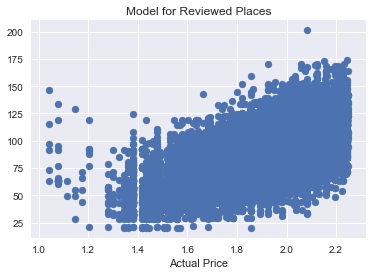

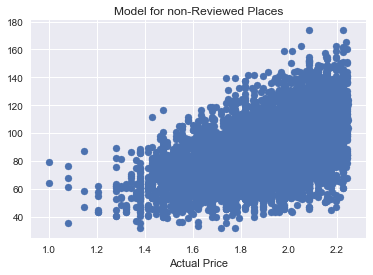

In [38]:
plt.scatter(paris_rev.log_price, lm_rev.predict(X))
plt.xlabel('Actual Price')
#plt.ylabel('Model Predicted Price')
plt.title('Model for Reviewed Places')
plt.show()

plt.scatter(paris_notrev.log_price, lm_nr.predict(X_nr))
plt.xlabel('Actual Price')
#plt.ylabel('Model Predicted Price')
plt.title('Model for non-Reviewed Places')
plt.show()

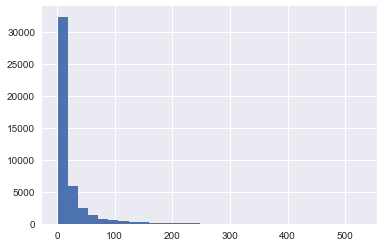

In [39]:
# Split by high reviews, low reviews

plt.hist(paris_rev.reviews, bins=30)
plt.show()

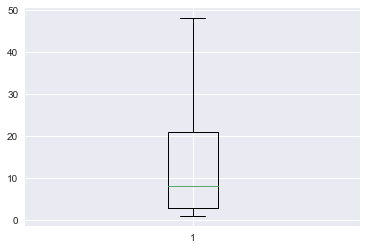

In [40]:
plt.boxplot(paris_rev.reviews.values, showfliers=False)
plt.show()

In [41]:
np.percentile(paris_rev.reviews, 25)

3.0

In [42]:
np.percentile(paris_rev.reviews, 50)

8.0

In [43]:
np.percentile(paris_rev.reviews, 75)

21.0

In [44]:
np.percentile(paris_rev.reviews, 95)

85.0

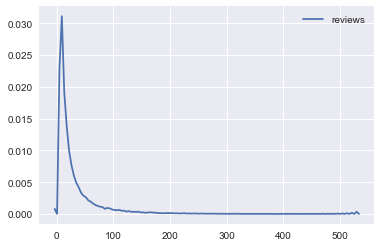

In [45]:
sns.kdeplot(paris_rev.reviews)
plt.show()

In [46]:
# split data into high and low number of reviews based on 50th percentile 
paris_avg = paris_rev[paris_rev['reviews'] <= 8]
paris_plus = paris_rev[paris_rev['reviews'] > 8]

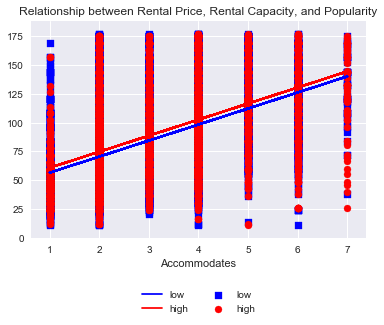

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(paris_avg.accommodates, paris_avg.price, c='b', marker="s", label='low')
m, b = np.polyfit(paris_avg.accommodates, paris_avg.price, 1)
ax1.plot(paris_avg.accommodates, m*paris_avg.accommodates + b, '-', c = 'b', label = 'low')
ax1.scatter(paris_plus.accommodates, paris_plus.price, c='r', marker="o", label='high')
l, p = np.polyfit(paris_plus.accommodates, paris_plus.price, 1)
ax1.plot(paris_plus.accommodates, l*paris_plus.accommodates + p, '-', c = 'r', label = 'high')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.title('Relationship between Rental Price, Rental Capacity, and Popularity')
plt.xlabel('Accommodates')
# plt.ylabel('Log of Price')
plt.show()

In [48]:
# regression  - 50th percentile 

X_bavg = paris_avg[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]

X_bavg = pd.get_dummies(X_bavg, columns = ['room_type', 'arrondissement'])

X_bavg = X_bavg.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [49]:
X_bavg = sm.add_constant(X_bavg)

y_bavg = paris_avg.price

lm_bavg = sm.OLS(y_bavg, X_bavg).fit()

print(lm_bavg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     731.3
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:45:56   Log-Likelihood:            -1.1008e+05
No. Observations:               23711   AIC:                         2.202e+05
Df Residuals:                   23687   BIC:                         2.204e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     33

In [50]:
coef_bavg = []
for i in lm_bavg.params:
    coef_bavg.append(i)

se_bavg = []
for i in lm_bavg.bse:
    se_bavg.append(i)
    
       
bavg_df = pd.DataFrame()
bavg_df['variable'] = X_bavg.columns

bavg_df['coefficients_bavg'] = coef_bavg

bavg_df['se_bavg'] = se_bavg

In [51]:
X_aavg = paris_plus[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]
X_aavg = pd.get_dummies(X_aavg, columns = ['room_type', 'arrondissement'])
X_aavg = X_aavg.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

X_aavg = sm.add_constant(X_aavg)
y_aavg = paris_plus.price
lm_aavg = sm.OLS(y_aavg, X_aavg).fit()

print(lm_aavg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     748.9
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:46:04   Log-Likelihood:                -99419.
No. Observations:               21473   AIC:                         1.989e+05
Df Residuals:                   21449   BIC:                         1.991e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     33

In [52]:
coef_aavg = []
for i in lm_aavg.params:
    coef_aavg.append(i)

se_aavg = []
for i in lm_aavg.bse:
    se_aavg.append(i)
    
       
aavg_df = pd.DataFrame()
aavg_df['variable'] = X_aavg.columns

aavg_df['coefficients_aavg'] = coef_aavg

aavg_df['se_aavg'] = se_aavg



ab_avg_df = bavg_df.merge(aavg_df)
ab_avg_df['zcore'] = z_score(ab_avg_df.coefficients_bavg, ab_avg_df.coefficients_aavg, ab_avg_df.se_bavg, ab_avg_df.se_aavg)

ab_avg_df


,variable,coefficients_bavg,se_bavg,coefficients_aavg,se_aavg,zcore
0,const,33.443130,0.761102,33.540215,0.910354,-0.194376
1,accommodates,8.344890,0.182816,8.170762,0.181994,10.056443
2,bedrooms,13.640654,0.303405,15.293642,0.325986,-13.865697
3,room_type_Private room,-19.490979,0.531513,-21.294430,0.569099,8.866872
4,room_type_Shared room,-29.249413,1.973053,-41.070379,1.748233,12.923754
5,arrondissement_1,39.488934,1.519394,40.955759,1.313006,-1.918487
6,arrondissement_2,30.519883,1.231241,29.656886,1.135312,1.811239
7,arrondissement_3,34.380957,1.054228,33.821438,1.054235,154.788217
8,arrondissement_4,37.532763,1.205190,38.360521,1.109602,-1.759725
9,arrondissement_5,25.702256,1.121573,28.264826,1.132999,-15.966023


In [53]:
# split data into high and low number of reviews based on 75th percentile 

paris_regular = paris_rev[paris_rev['reviews'] <= 21]
paris_highish = paris_rev[paris_rev['reviews'] > 21]

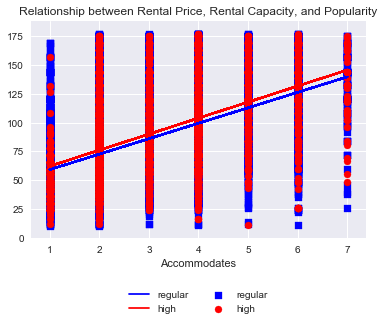

In [54]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

paris_low = paris[paris['reviews'] <= 21]
paris_reg = paris[paris['reviews'] > 21]
ax1.scatter(paris_low.accommodates, paris_low.price, c='b', marker="s", label='regular')
m, b = np.polyfit(paris_low.accommodates, paris_low.price, 1)
ax1.plot(paris_low.accommodates, m*paris_low.accommodates + b, '-', c = 'b', label = 'regular')
ax1.scatter(paris_reg.accommodates, paris_reg.price, c='r', marker="o", label='high')
l, p = np.polyfit(paris_reg.accommodates, paris_reg.price, 1)
ax1.plot(paris_reg.accommodates, l*paris_reg.accommodates + p, '-', c = 'r', label = 'high')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.title('Relationship between Rental Price, Rental Capacity, and Popularity')
plt.xlabel('Accommodates')
#plt.ylabel('Log of Price')
plt.show()

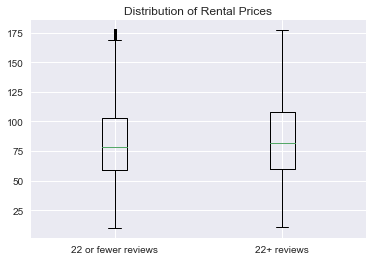

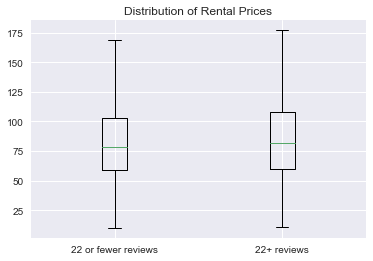

In [55]:
paris_low = paris[paris['reviews'] <= 21]
paris_reg = paris[paris['reviews'] > 21]

plt.boxplot([paris_low.price, paris_reg.price], sym='k.')
plt.xticks([1, 2], ['22 or fewer reviews', '22+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

plt.boxplot([paris_low.price, paris_reg.price], showfliers=False)
plt.xticks([1, 2], ['22 or fewer reviews', '22+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

In [56]:
X_regular = paris_regular[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]

X_regular = pd.get_dummies(X_regular, columns = ['room_type', 'arrondissement'])

X_regular = X_regular.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)


In [57]:
X_highish = paris_highish[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]

X_highish = pd.get_dummies(X_highish, columns = ['room_type', 'arrondissement'])

X_highish = X_highish.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [58]:
# regression for reviewed houses below 75th percentile
X_regular = sm.add_constant(X_regular)

y_regular = paris_regular.price

lm_regular = sm.OLS(y_regular, X_regular).fit()

print(lm_regular.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1097.
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:46:18   Log-Likelihood:            -1.5735e+05
No. Observations:               33927   AIC:                         3.148e+05
Df Residuals:                   33903   BIC:                         3.150e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     33

In [59]:
coef_regular = []
for i in lm_regular.params:
    coef_regular.append(i)

se_regular = []
for i in lm_regular.bse:
    se_regular.append(i)
    
       
regular_df = pd.DataFrame()
regular_df['variable'] = X_regular.columns

regular_df['coefficients_regular'] = coef_regular

regular_df['se_regular'] = se_regular

In [60]:
# regression for things above 75th percentile 

X_highish = sm.add_constant(X_highish)

y_highish = paris_highish.price

lm_highish = sm.OLS(y_highish, X_highish).fit()

print(lm_highish.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:46:21   Log-Likelihood:                -52157.
No. Observations:               11257   AIC:                         1.044e+05
Df Residuals:                   11233   BIC:                         1.045e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     34

In [61]:
coef_highish = []
for i in lm_highish.params:
    coef_highish.append(i)

se_highish = []
for i in lm_highish.bse:
    se_highish.append(i)
    
       
highish_df = pd.DataFrame()
highish_df['variable'] = X_highish.columns

highish_df['coefficients_highish'] = coef_highish

highish_df['se_highish'] = se_highish

In [62]:
regular_highish_df = regular_df.merge(highish_df)

regular_highish_df['zcore'] = z_score(regular_highish_df.coefficients_regular, regular_highish_df.coefficients_highish,
                                     regular_highish_df.se_regular, regular_highish_df.se_highish)

regular_highish_df

,variable,coefficients_regular,se_regular,coefficients_highish,se_highish,zcore
0,const,33.257074,0.645774,34.073194,1.367938,-0.676764
1,accommodates,8.283863,0.150619,8.233193,0.250305,0.253457
2,bedrooms,14.359802,0.253385,14.466370,0.462206,-0.275682
3,room_type_Private room,-20.129536,0.450971,-21.119413,0.768173,1.591789
4,room_type_Shared room,-32.253793,1.654556,-42.271737,2.151112,7.287511
5,arrondissement_1,40.253200,1.217009,40.699558,1.779579,-0.343781
6,arrondissement_2,30.233439,0.998297,29.656927,1.578691,0.471401
7,arrondissement_3,34.509853,0.860795,33.368180,1.511360,0.919020
8,arrondissement_4,37.890593,0.970186,38.334974,1.555821,-0.365363
9,arrondissement_5,26.696902,0.918317,28.201894,1.620028,-1.127664


In [63]:
# split data into high and low number of reviews based on 95th percentile 

paris_reg = paris[paris['reviews'] <= 81]
paris_high = paris[paris['reviews'] > 81]

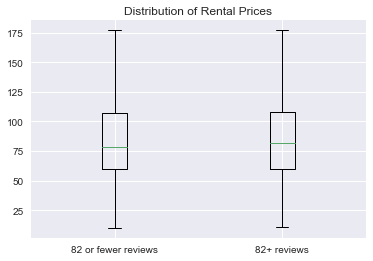

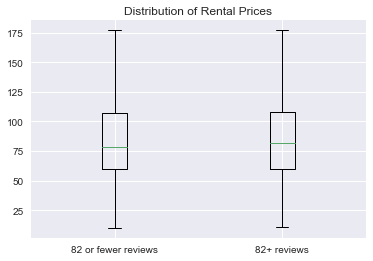

In [64]:
# examine data 

plt.boxplot([paris_reg.price, paris_high.price], sym='k.')
plt.xticks([1, 2], ['82 or fewer reviews', '82+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

plt.boxplot([paris_reg.price, paris_high.price], showfliers=False)
plt.xticks([1, 2], ['82 or fewer reviews', '82+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

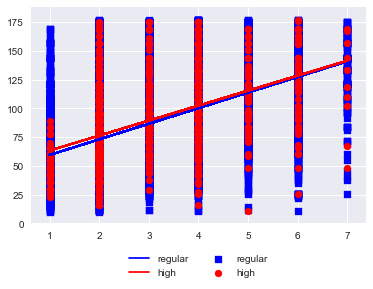

In [65]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(paris_reg.accommodates, paris_reg.price, c='b', marker="s", label='regular')
m, b = np.polyfit(paris_reg.accommodates, paris_reg.price, 1)
ax1.plot(paris_reg.accommodates, m*paris_reg.accommodates + b, '-', c = 'b', label = 'regular')
ax1.scatter(paris_high.accommodates, paris_high.price, c='r', marker="o", label='high')
l, p = np.polyfit(paris_high.accommodates, paris_high.price, 1)
ax1.plot(paris_high.accommodates, l*paris_high.accommodates + p, '-', c = 'r', label = 'high')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

In [66]:
# linear regression - rentals with high number of reviews versus typical number of reviews 

X_reg = paris_reg[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]
X_reg = pd.get_dummies(X_reg, columns = ['room_type', 'arrondissement'])

X_reg = X_reg.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [67]:
X_high = paris_high[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]

X_high = pd.get_dummies(X_high, columns = ['room_type', 'arrondissement'])

X_high = X_high.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [68]:
# regression: rentals with typical number of reviews 

X_reg = sm.add_constant(X_reg)

y_reg = paris_reg.price

lm_reg = sm.OLS(y_reg, X_reg).fit()

print(lm_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     1702.
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:46:28   Log-Likelihood:            -2.7577e+05
No. Observations:               59065   AIC:                         5.516e+05
Df Residuals:                   59041   BIC:                         5.518e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     35

In [69]:
coef_reg = []
for i in lm_reg.params:
    coef_reg.append(i)

se_reg = []
for i in lm_reg.bse:
    se_reg.append(i)
    
       
reg_df = pd.DataFrame()
reg_df['variable'] = X_reg.columns

reg_df['coefficients_reg'] = coef_reg

reg_df['se_reg'] = se_reg

In [70]:
# regression - rentals with high number of reviews 

X_high = sm.add_constant(X_high)

y_high = paris_high.price

lm_high = sm.OLS(y_high, X_high).fit()

print(lm_high.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     68.49
Date:                Tue, 27 Mar 2018   Prob (F-statistic):          1.40e-241
Time:                        18:46:30   Log-Likelihood:                -11043.
No. Observations:                2378   AIC:                         2.213e+04
Df Residuals:                    2354   BIC:                         2.227e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     36

In [71]:
coef_high = []
for i in lm_high.params:
    coef_high.append(i)

se_high = []
for i in lm_high.bse:
    se_high.append(i)
    
       
high_df = pd.DataFrame()
high_df['variable'] = X_high.columns

high_df['coefficients_high'] = coef_high

high_df['se_high'] = se_high

In [72]:
reg_high_df = reg_df.merge(high_df)

reg_high_df['zcore'] = z_score(reg_high_df.coefficients_reg, reg_high_df.coefficients_high,
                                     reg_high_df.se_reg, reg_high_df.se_high)

reg_high_df

,variable,coefficients_reg,se_reg,coefficients_high,se_high,zcore
0,const,35.665447,0.508175,36.077688,3.651333,-0.114011
1,accommodates,7.934377,0.117282,8.121604,0.530013,-0.362230
2,bedrooms,14.232296,0.197047,11.908735,1.033207,2.290931
3,room_type_Private room,-19.177423,0.347485,-19.262104,1.674323,0.051702
4,room_type_Shared room,-32.890770,1.189374,-42.001344,4.864661,1.931424
5,arrondissement_1,39.619263,0.932340,37.423093,4.179276,0.539076
6,arrondissement_2,29.547433,0.766850,27.362430,3.854537,0.578428
7,arrondissement_3,32.884859,0.676035,32.111018,3.779773,0.208088
8,arrondissement_4,37.576070,0.754120,33.394371,3.768525,1.132546
9,arrondissement_5,26.029867,0.717767,26.636173,4.147931,-0.148410
